In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/MIS444 PREDICTION DATASET/cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
# Data Checking

print(df.head())
print(df.info())
print(df.describe())
print("Missing Values:\n", df.isnull().sum())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3        90    5.0  
4      88.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB
None


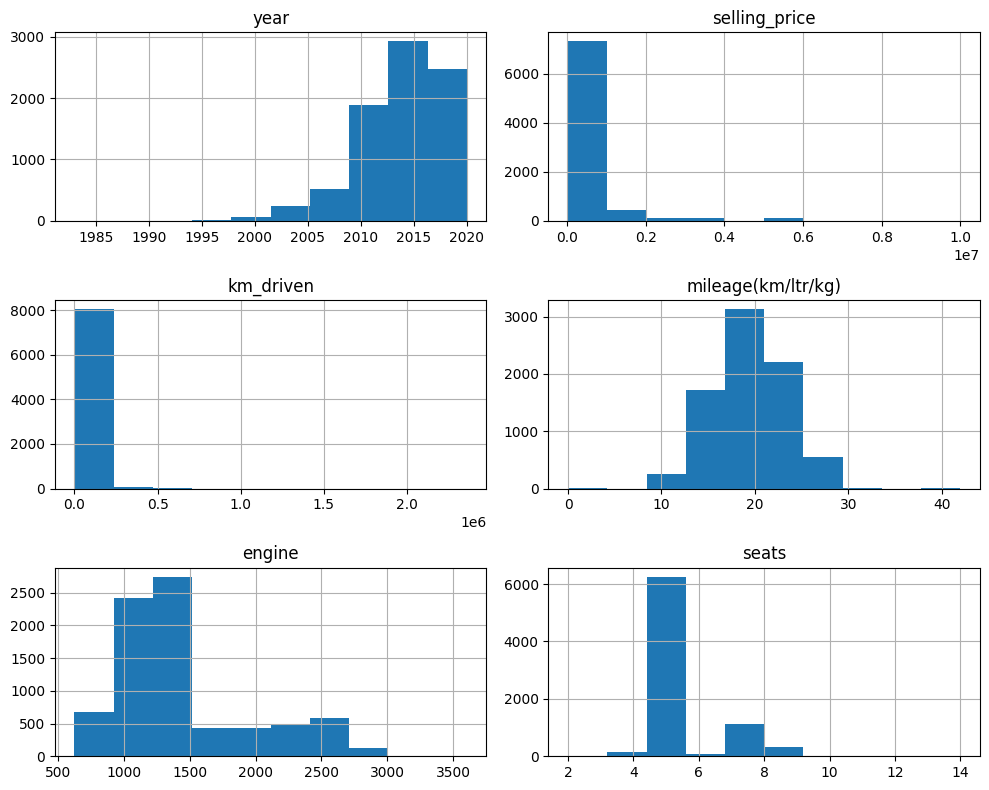

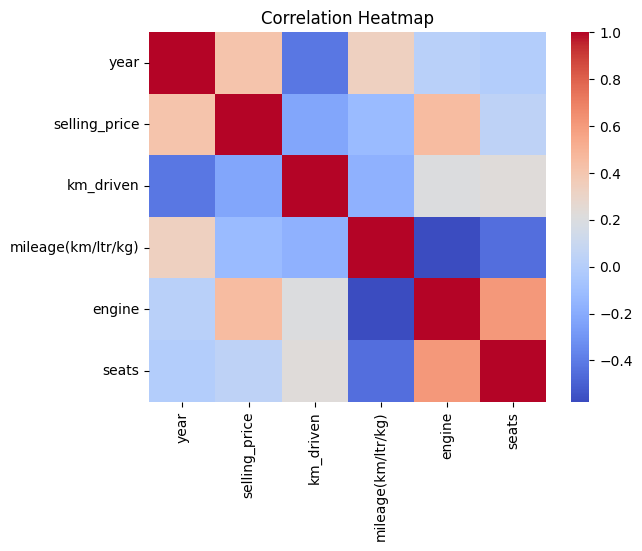

In [ ]:
# Exploratory Data Analysis (EDA)

# Display basic information about the dataset
print(df.info())

# Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

numerical_df = df[numerical_cols]
sns.heatmap(numerical_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Data Cleaning
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [ ]:
# Preprocessing
X = df.drop(columns=["selling_price"])
y = df["selling_price"]

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [ ]:
 # Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Feature Selection
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['year', 'engine', 'name_BMW X4 M Sport X xDrive20d',
       'name_Lexus ES 300h', 'name_Volvo XC40 D4 Inscription BSIV',
       'seller_type_Individual', 'transmission_Manual', 'max_power_177',
       'max_power_190', 'max_power_214.56'],
      dtype='object')


In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

In [ ]:
# Define Models

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
}

results = {}

In [ ]:
# TRAIN MODELS

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
print("\n All models trained successfully!")




 All models trained successfully!


In [ ]:
# CROSS VALIDATION

cv_results = {}
for name, model in trained_models.items():
    cv_scores = cross_val_score(model, X_selected, y, cv=20, scoring="r2")
    cv_results[name] = np.mean(cv_scores)
    print(f"{name} | Cross-Validation Mean R2: {np.mean(cv_scores):.4f}")


    print(f"\n{name} Performance:")
    print(f"Cross-Validation R2 (avg): {np.mean(cv_scores):.4f}")
    print(f"Test R2: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    print("-" * 50)

Linear Regression | Cross-Validation Mean R2: 0.7522

Linear Regression Performance:
Cross-Validation R2 (avg): 0.7522
Test R2: 0.9512, RMSE: 165150.37, MAE: 94142.24
--------------------------------------------------
Ridge Regression | Cross-Validation Mean R2: 0.7522

Ridge Regression Performance:
Cross-Validation R2 (avg): 0.7522
Test R2: 0.9512, RMSE: 165150.37, MAE: 94142.24
--------------------------------------------------
Lasso Regression | Cross-Validation Mean R2: 0.7522

Lasso Regression Performance:
Cross-Validation R2 (avg): 0.7522
Test R2: 0.9512, RMSE: 165150.37, MAE: 94142.24
--------------------------------------------------
Random Forest | Cross-Validation Mean R2: 0.9214

Random Forest Performance:
Cross-Validation R2 (avg): 0.9214
Test R2: 0.9512, RMSE: 165150.37, MAE: 94142.24
--------------------------------------------------
XGBoost | Cross-Validation Mean R2: 0.9291

XGBoost Performance:
Cross-Validation R2 (avg): 0.9291
Test R2: 0.9512, RMSE: 165150.37, MAE: 94

In [ ]:
# RESULT EVALUATION

results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        "R2 Test": r2,
        "CV R2 (mean)": cv_results.get(name, np.nan),
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    }
    print(f"{name} | R2 Test: {r2:.4f} | CV R2 (mean): {cv_results.get(name, np.nan):.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")
    print("-" * 50)

    print(f"\n{name} Performance:")
    print(f"Cross-Validation R2 (avg): {cv_results.get(name, np.nan):.4f}")
    print(f"Test R2: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")



Linear Regression | R2 Test: 0.8027 | CV R2 (mean): 0.7522 | RMSE: 359630.0289 | MAE: 199309.5127
--------------------------------------------------

Linear Regression Performance:
Cross-Validation R2 (avg): 0.7522
Test R2: 0.8027, RMSE: 359630.03, MAE: 199309.51
Ridge Regression | R2 Test: 0.8027 | CV R2 (mean): 0.7522 | RMSE: 359628.2296 | MAE: 199306.9606
--------------------------------------------------

Ridge Regression Performance:
Cross-Validation R2 (avg): 0.7522
Test R2: 0.8027, RMSE: 359628.23, MAE: 199306.96
Lasso Regression | R2 Test: 0.8027 | CV R2 (mean): 0.7522 | RMSE: 359630.0300 | MAE: 199309.5131
--------------------------------------------------

Lasso Regression Performance:
Cross-Validation R2 (avg): 0.7522
Test R2: 0.8027, RMSE: 359630.03, MAE: 199309.51
Random Forest | R2 Test: 0.9369 | CV R2 (mean): 0.9214 | RMSE: 203403.1121 | MAE: 96445.7063
--------------------------------------------------

Random Forest Performance:
Cross-Validation R2 (avg): 0.9214
Test R


Model Comparison:
                     R2 Test  CV R2 (mean)           MSE           RMSE  \
Linear Regression  0.802690      0.752189  1.293338e+11  359630.028889   
Ridge Regression   0.802692      0.752194  1.293325e+11  359628.229638   
Lasso Regression   0.802690      0.752189  1.293338e+11  359630.030048   
Random Forest      0.936882      0.921379  4.137283e+10  203403.112063   
XGBoost            0.943136      0.929129  3.727342e+10  193063.263911   

                             MAE  
Linear Regression  199309.512748  
Ridge Regression   199306.960551  
Lasso Regression   199309.513111  
Random Forest       96445.706286  
XGBoost             98530.437500  


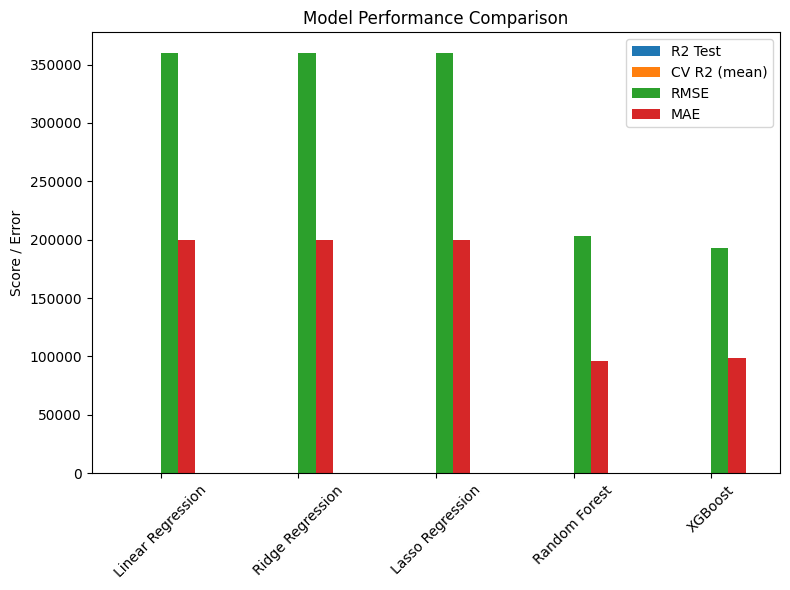

In [ ]:
# Compare Models

results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)

# Plot comparison with grouped bars
results_df[["R2 Test", "CV R2 (mean)", "RMSE", "MAE"]].plot(kind="bar", figsize=(8,6), rot=45, legend=True)
plt.title("Model Performance Comparison")
plt.ylabel("Score / Error")
plt.tight_layout()
plt.show()

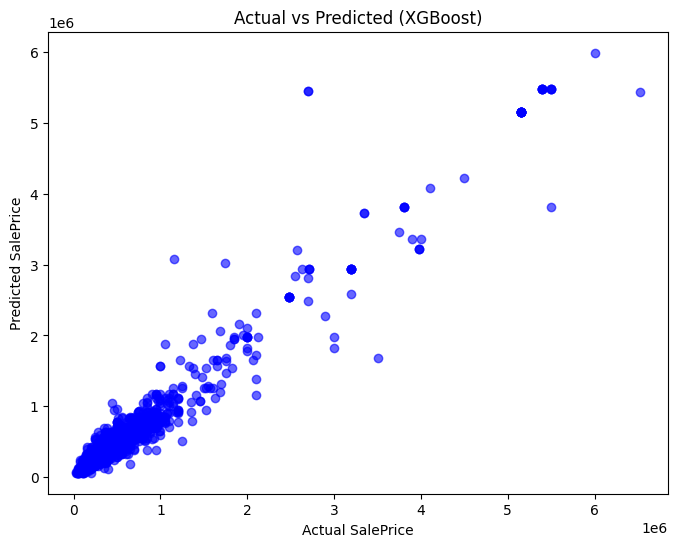


✅ Best Model: XGBoost
This model has the highest R² and lowest error, showing it best captures the relationship between car features and prices.


In [230]:
# INTERPRETATION

# Pick best model
best_model_name = results_df["R2 Test"].idxmax()
best_model = trained_models[best_model_name]
best_pred = best_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, best_pred, alpha=0.6, color="blue")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.show()

print(f"\n✅ Best Model: {best_model_name}")
print("This model has the highest R² and lowest error, showing it best captures "
      "the relationship between car features and prices.")